In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.abspath("./")))
from quantata.ratio import calc_ma, calc_macd, calc_macd_oscillator, calc_macd_signal, calc_ema
from quantata.backtest import calc_signal, simulate, calc_asset, calc_return

In [2]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [3]:
df = yf.Ticker("005930.KS").history(period="1y")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-08-19 to 2022-08-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          245 non-null    float64
 1   High          245 non-null    float64
 2   Low           245 non-null    float64
 3   Close         245 non-null    float64
 4   Volume        245 non-null    int64  
 5   Dividends     245 non-null    float64
 6   Stock Splits  245 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 15.3 KB


In [4]:
df["MA"] = calc_ma(df.Close, 3)
df["EMA"] = calc_ema(df.Close, 3)
df["MACD"] = calc_macd(df.Close, 12, 26)
df["MACDSignal"] = calc_macd_signal(df.Close, 12, 26, 9)
df["MACDOscillator"] = calc_macd_oscillator(df.Close, 12, 26, 9)

In [5]:
df_new = df[["MACD", "MACDSignal", "MACDOscillator"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]

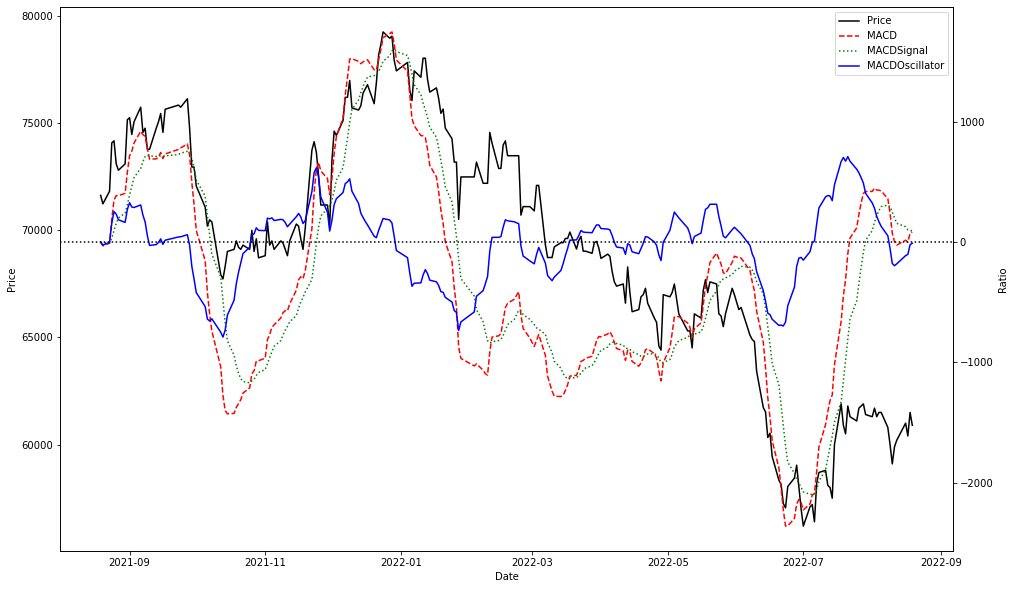

In [6]:
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
ax1.ticklabel_format(useOffset=False, style="plain", axis="y")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"MACD": "r", "MACDSignal": "g", "MACDOscillator": "b"}, ax=ax2
)
ax2.axhline(y=0, color='k', linestyle=":")
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle(":")
ax2.ticklabel_format(useOffset=False, style="plain", axis="y")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="MACD", color="r", linestyle="--"),
    Line2D([0], [0], label="MACDSignal", color="g", linestyle=":"),
    Line2D([0], [0], label="MACDOscillator", color="b"),
    ])

In [7]:
df["Signal"] = calc_signal(df["MACDOscillator"], 0, 0)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, False, 10_000_000)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,EMA,MACD,MACDSignal,MACDOscillator,Signal,Amount,Volume_,Fee,Position,Capital,Asset
Date,,,,,,,,,,,,,,,,,,,
2021-08-19,72008.586589,72890.324384,71616.703125,71616.703125,22166298,0.0,0,71616.703125,71616.703125,0.000000,0.000000,0.000000,0,-0.000000,0,0,0,1.000000e+07,1.000000e+07
2021-08-20,72008.587249,72400.470717,71028.878578,71224.820312,22364803,0.0,0,71224.820312,71420.761719,-31.261307,-6.252261,-25.009046,-8,0.000000,0,0,0,1.000000e+07,1.000000e+07
2021-08-23,71812.648438,72498.444534,71518.735825,71812.648438,19384648,0.0,0,71551.390625,71616.705078,-8.505258,-6.702861,-1.802397,0,-0.000000,0,0,0,1.000000e+07,1.000000e+07
2021-08-24,72400.471799,74163.947431,72400.471799,74065.976562,21016913,0.0,0,72367.815104,72841.340820,189.173153,32.472342,156.700811,5,370329.882812,5,371,5,9.629299e+06,9.999629e+06
2021-08-25,74653.799641,75045.683104,73380.178387,74163.945312,22319664,0.0,0,73347.523438,73502.643066,349.708752,95.919624,253.789128,8,593311.562500,8,594,13,9.035394e+06,9.999525e+06


In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,EMA,MACD,MACDSignal,MACDOscillator,Signal,Amount,Volume_,Fee,Position,Capital,Asset
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.0,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.000000,245.000000,2.450000e+02,2.450000e+02
mean,69070.299694,69549.799496,68485.908353,68967.147274,1.465255e+07,5.893878,0.0,69009.006245,69010.727218,-315.271654,-316.810558,1.538904,-34.285714,-9.540571e+02,0.000000,394.685714,50.926531,6.711428e+06,1.025288e+07
std,5845.724792,5786.181021,5762.579412,5800.022647,5.983970e+06,45.842444,0.0,5747.697009,5733.042250,947.239501,880.211282,311.596470,67.163124,7.888717e+05,11.573004,682.838839,49.127914,3.459892e+06,3.179086e+05
min,56100.000000,57300.000000,55700.000000,56200.000000,0.000000e+00,0.000000,0.0,56766.666667,56752.733984,-2359.153438,-2096.493954,-789.200542,-253.000000,-5.695256e+06,-73.000000,0.000000,0.000000,2.040040e+04,9.566616e+06
25%,65996.458018,66493.420594,65499.491882,65897.062500,1.116900e+07,0.000000,0.0,65930.194010,65953.886637,-982.689465,-929.038735,-156.380357,-50.000000,0.000000e+00,0.000000,0.000000,9.000000,4.551315e+06,1.004686e+07
50%,69475.184570,69889.985886,69019.030159,69397.804688,1.369113e+07,0.000000,0.0,69364.994792,69361.354951,-508.464852,-552.013783,45.230401,1.000000,0.000000e+00,0.000000,201.000000,32.000000,8.158952e+06,1.037672e+07
75%,73772.070312,74160.850401,73086.265625,73729.015625,1.760077e+07,0.000000,0.0,73600.523438,73526.594273,420.498054,294.594412,183.506344,5.000000,3.455125e+05,5.000000,512.000000,82.000000,9.639440e+06,1.051229e+07
max,79339.902665,79536.770730,78946.151145,79241.460938,3.794336e+07,361.000000,0.0,79077.403646,78914.443012,1745.962280,1599.609864,709.775312,22.000000,1.339800e+06,22.000000,5696.000000,168.000000,1.059899e+07,1.079432e+07


<AxesSubplot:xlabel='Date', ylabel='Asset'>

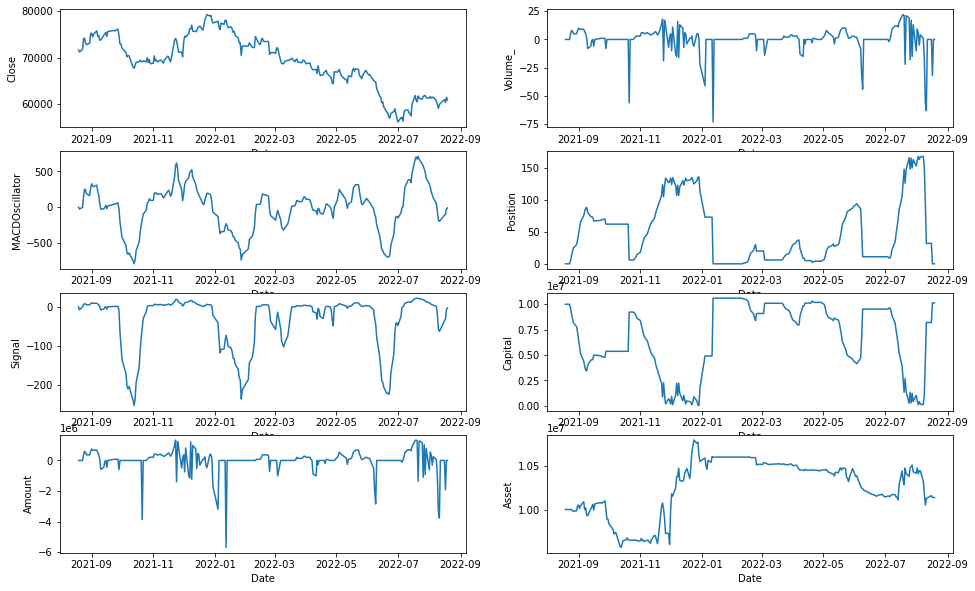

In [9]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MACDOscillator", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [10]:
print(calc_return(df["Capital"]))

0.013704599609375
